# Python Workshop II - Python for Data Science/Analysis

### Thom Harvey-Ball & Jason Laurie
#### Aston University, February 2020

Welcome to the second Python workshop which will build on the foundations of the first session. We will quickly recap some of the more relevant parts of the previous exercises before moving on to explore more of the capabilities of the Seaborn, Panda and MatPlotLib libraries. We begin by importing the libraries we will need for the session:

In [1]:
#Importing libraries
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#format plots to appear in the notebook
%matplotlib inline

# Section 1: Introduction

We will recap some of the things we did in the last session, but instead of using `numpy` we will use `pandas` and instead of `matplotlib` we will use `seaborn`. First we will import a dataset of random x and y values into a pandas DataFrame which we will call `data`. Next, we display the first few rows using the `head` attribute.

In [2]:
#import the random data to a pandas dataframe
data = pd.read_csv('randomData.csv')

#display the first 5 rows
data.head(5)

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


## Task I (10 Minutes)

Use the cells below to display the first 10, 20, 50 rows of the data. Then experiment to find out how to display the last few records.

In [3]:
#display the first 10 rows
data.head(10)

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
5,38.7179,84.8718
6,35.6410,79.8718
7,33.0769,77.5641
8,28.9744,74.4872
9,26.1538,71.4103


In [4]:
#display the first 20 rows
data.head(20)

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
5,38.7179,84.8718
6,35.6410,79.8718
7,33.0769,77.5641
8,28.9744,74.4872
9,26.1538,71.4103


In [5]:
#display the first 50 rows
data.head(50)

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
5,38.7179,84.8718
6,35.6410,79.8718
7,33.0769,77.5641
8,28.9744,74.4872
9,26.1538,71.4103


In [6]:
#display the final 10 records
data.tail(10)

,x,y
132,78.2051,10.6410
133,67.9487,8.7180
134,68.4615,5.2564
135,68.2051,2.9487
136,37.6923,25.7692
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000
141,44.1026,92.6923


Now that you've seen a few of the records, we should verify what type of data we are dealing with. We can do this via the `dtype` function:

In [7]:
#check the data type of the 'x' column
data['x'].dtype

dtype('float64')

#### Short task:
Use the cell below to check the datatype of the `y` column in our dataframe:

In [8]:
#check the data type of the 'y' column
data['y'].dtype

dtype('float64')

The `dtype` attribute works on columns of a dataframe as shown above. If we try to use the `dtype` attribute on a full dataframe, we get an "attribute error". This tells us that the object we are trying to inspect, does not have the type of metadata we are trying to find.

In [9]:
#trying to use a non-existant attribute
data.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

If we want to explore a full dataframe, we need to use `dtypes` instead:

In [10]:
#display the datatypes of all columns in a dataframe
data.dtypes

x    float64
y    float64
dtype: object

Pandas dataframes have many attributes which we can use to get a good idea of what sort of data we are looking at, how much of it there is etc...

## Task II (10 Minutes):
Use the cells below to experiment with the following dataframe attributes: `columns`, `axes`, `ndim`, `size`, `shape` and `values`. Try to work out what each attribute tells you about the data. It may be helpful for you to make some notes in the cells using comments (#).

In [11]:
#columns:
data.columns

Index(['x', 'y'], dtype='object')

In [12]:
#axes:
data.axes

[RangeIndex(start=0, stop=142, step=1), Index(['x', 'y'], dtype='object')]

In [13]:
#ndim:
data.ndim

2

In [14]:
#size:
data.size

284

In [15]:
#shape:
data.shape

(142, 2)

In [16]:
#values:
data.values

array([[55.3846, 97.1795],
       [51.5385, 96.0256],
       [46.1538, 94.4872],
       [42.8205, 91.4103],
       [40.7692, 88.3333],
       [38.7179, 84.8718],
       [35.641 , 79.8718],
       [33.0769, 77.5641],
       [28.9744, 74.4872],
       [26.1538, 71.4103],
       [23.0769, 66.4103],
       [22.3077, 61.7949],
       [22.3077, 57.1795],
       [23.3333, 52.9487],
       [25.8974, 51.0256],
       [29.4872, 51.0256],
       [32.8205, 51.0256],
       [35.3846, 51.4103],
       [40.2564, 51.4103],
       [44.1026, 52.9487],
       [46.6667, 54.1026],
       [50.    , 55.2564],
       [53.0769, 55.641 ],
       [56.6667, 56.0256],
       [59.2308, 57.9487],
       [61.2821, 62.1795],
       [61.5385, 66.4103],
       [61.7949, 69.1026],
       [57.4359, 55.2564],
       [54.8718, 49.8718],
       [52.5641, 46.0256],
       [48.2051, 38.3333],
       [49.4872, 42.1795],
       [51.0256, 44.1026],
       [45.3846, 36.4103],
       [42.8205, 32.5641],
       [38.7179, 31.4103],
 

As well as attributes, which require no punctuation, Python also has methods which use parentheses (regardless of whether any options are specified). We have already seen two methods when we used `.head(n)` and `.tail(n)`. Both of these methods used a parameter (n) to determine how many records to display but they will still execute without the parameter.

There are many other methods which we can use with dataframes. We will not see all of them, but a few of the more important ones are: `.describe()`, `.max()`, `.min()`, `.quantile(n)`, `.mean()`, `.std()`, `.sample(n)` and `.dropna()`. Let's explore some methods, starting with `.describe()`:

In [17]:
#describe our dataframe
data.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


It should be clear that `.describe()` gives a useful list of descriptive statistics for all the numeric columns of a dataframe. The next one we should look at is `.sample([n])`:

In [18]:
#generate a random sample of 10 records from our data and store it as a new dataframe called 'randSample'
randSample = data.sample(10)

#display the full dataframe of the random sample
randSample

,x,y
65,48.2051,84.1026
113,49.7436,17.5641
93,87.9487,46.0256
129,66.9231,10.6410
48,41.0256,25.2564
18,40.2564,51.4103
78,57.9487,99.4872
73,50.0000,78.7180
133,67.9487,8.7180
16,32.8205,51.0256


Again, it should be clear what `.randsample(n)` does. It will be useful for us when we come to use a larger dataset. Finally, we will look at `.dropna()`:

In [19]:
data.dropna()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


This time it is less obvious what's happened. Actually, this time, nothing's happened! `.dropna()` removes all records from the dataframe which include any missing entries, leaving behind a dataset with better integrity. I have already ensured a complete dataset for this exercise so there were no records to remove. Again, we will need this later to ensure the data we are working on does not cause us unnecessary headaches!

Let's extract some specific statistics from our data. If we want the mean of each column, we can use the `.mean()` method on the dataframe:

In [20]:
data.mean()

x    54.263273
y    47.832253
dtype: float64

We can also calculate the mean (and other statistics) of a sample of the data. For instance, the cell below will give the mean of the final 10 rows:

In [21]:
data.tail(10).mean()

x    59.33333
y    40.37179
dtype: float64

...and the cell below will calculuate only the mean of the 'x' column:

In [22]:
data['x'].mean()

54.26327323943664

...the next cell will calculate the standard deviation of a random sample of 10 of the last 100 records for the 'y'  column:

In [23]:
data['y'].tail(100).sample(10).std()

28.32040127662389

...the next cell calculuates the lower quantile of both columns:

In [24]:
data.quantile(.25)

x    44.10260
y    25.28845
Name: 0.25, dtype: float64

So you can see that we can be more and more specific about the selection of data we want to calculate statistics for.

## Task III (20 minutes)
Using everything we have looked at, calculate:\
i) The mean of each column of the first 15 rows,\
ii) The standard deviation of the last 20 rows of the 'x' column,\
iii) The minimum value of the 'y' column in a random sample of 30 records,\
iv) The interquartile range of both columns in the full dataset.\
\
Use the cells below for your code:

In [25]:
#The mean of the first 15 rows:
data.head(15).mean()

x    34.41024
y    76.33334
dtype: float64

In [26]:
#stdev of 'x' in last 20 rows:
data['x'].tail(20).std()

14.153611699130478

In [27]:
#min of 'y' in random sample of 30 rows
data.sample(30)['y'].min()

9.8718

In [28]:
#IQR of both columns in full set
data.quantile(.75)-data.quantile(.25)

x    20.641000
y    43.237225
dtype: float64

We've now seen a lot of statistics about this data, although we haven't really done much analysis yet! Personally, I think it's always worth getting a basic understanding of our data from a visual perspective before we start any analysis. Let's see how to plot data with the `seaborn` library.

## 1.1 Plotting with Seaborn

Recall that we imported the `seaborn` library as `sns`. `Seaborn` has multiple types of plot which work pretty much straight out of the box. Let's experiment with a few of them now. Execute each of the cells below and see what the plot tells you about the data.

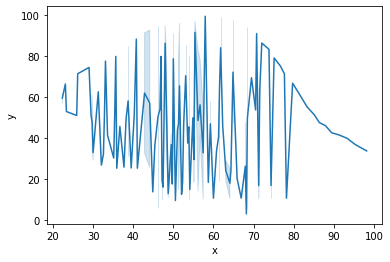

In [29]:
ax = sns.lineplot(x='x', y='y', data=data)

Above, we have a line plot of the data. Seaborn plots each datapoint and links each point together. This doesn't appear to show much of a trend or correlation between 'x' and 'y'... Let's move on...

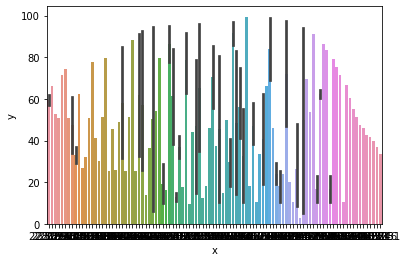

In [30]:
ax = sns.barplot(x='x', y='y', data=data)

Now we have a bar chart of the data. We are getting a rainbow of colours because Seaborn is treating each 'x' value as a different series of data and colour-coding it. You will also notice the x-axis labels are a complete mess. This is definitely not the right chart for this data...

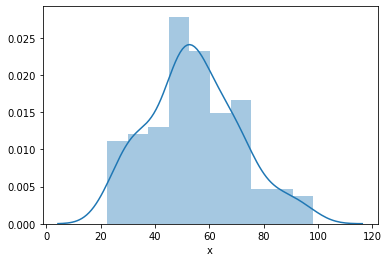

In [31]:
ax = sns.distplot(data['x'])

Now we have a distribution plot of the 'x' column - it is a histogram with a fitted curve. This shows that the data is pretty normally (Gaussian) distributed. We can superimpose the normal distribution with the mean and std of 'x' by using the SciPi Stats library to plot the pdf of the Gaussian distribution:

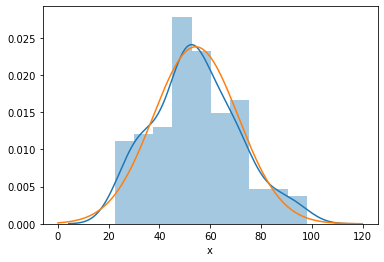

In [32]:
fig, ax = plt.subplots()
mean = data['x'].mean()
standard_deviation = data['x'].std()
range = np.arange(0, 120, 0.1)

sns.distplot(data['x'],ax=ax)
sns.lineplot(range, sp.stats.norm.pdf(range, mean, standard_deviation), ax=ax)

plt.show()

We have seen that the 'x' data is somewhat Gaussian, but we don't have a very clear picture still. Let's try a scatter plot instead. Execute the following cell:

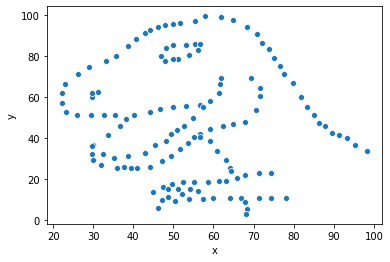

In [33]:
ax = sns.scatterplot(x='x', y='y', data=data)

That's more like it! Now we've got a much better picture of what's going on! Perhaps it's time to move onto a real-world dataset.

# Section 2: A real life example
### Ordinary Least Squares Regression

Let's look at some real data. Execute the following cell to load in a large dataset concerning the salaries of certain academics at a university.

In [34]:
salaries = pd.read_csv('Salaries.csv')
salaries.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


Use the `.dtypes` and `.describe()` functions to explore the data in the cells below:

In [35]:
#determine the datatype of each column:
salaries.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [36]:
#give descriptive statistics about each numeric column
salaries.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


You can see that there are 78 records in total. We are going to compare the salaries of male and female academics. To do this, we need to 'slice' the data into two sets; 'female_staff' and 'male_staff'. We can do this by creating two new dataframes from conditions placed on the original larger dataframe. This has the advantage that our original data is untouched in case we need to come back to it later.

In [37]:
#split dataframe to only female academics' entries
female_staff = salaries[salaries['sex'] == 'Female']
female_staff.head()

,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


In [38]:
#split dataframe to only male academics' entries
male_staff = salaries[salaries['sex'] == 'Male']
male_staff.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


Let's look at the mean salaries of the two groups. We could just use the `.mean()` method alone, but we can also use the `print` command to present clearer data. We also need to round the statistics to a meaningful degree of accuracy; as we are talking about money, 2 decimal places is sufficient.

In [39]:
#Print the mean salaries of each split dataframe
print("Male Average Salary: $",round(male_staff.salary.mean(),2))
print("Female Average Salary: $",round(female_staff.salary.mean(),2))

Male Average Salary: $ 115045.15
Female Average Salary: $ 101002.41


So we can see that the average salary for male adacdemics is greater than that for women, but it is possible that this is simply becuase the men in the university have been employed longer than the women on average. To test this we will look at an ordinary least-squares regression. We can test the correlation between length of service against salary for each sex, and determine whether the starting salary and per-year-of-service salary increase is equal for both sexes. To begin with, use the `Seaborn` package to plot a scatter graph of salary against service, colour coding for sex:

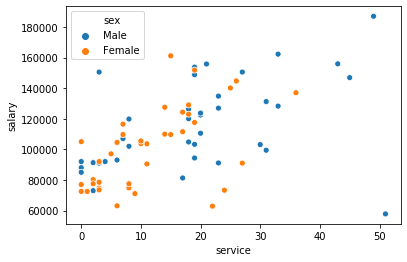

In [40]:
#plot a seaborn (sns) scatterplot with service on the x axis, salary on the y axis and colour (hue) coded by sex 
#from the salaries dataframe
ax = sns.scatterplot(x='service', y='salary', hue='sex', data=salaries)

Notice that we have introduced a new parameter to the `scatterplot` method; 'hue' can be used to tell `Seaborn` how to separate the data and automatically produces a legend.

We are now going to perform a linear regression on the data to see how strongly correlated an academic's salary is to the number of years of service they have, to do this we use the `statsmodels` library (smf) and the *ordinary least squares* regression function. The results of the regression are stored as a "linear model" which we have called `lm_salaries`.

We are essentially testing the hypothesis that H_0 is "years of service has no predictive power of salary" and H_1 is "years of service can predict salary" and we are going to take a 95% confidence level. This means that we are looking for a p-value less that 0.05 when comparing our model against one which does not account for years of service.

We need to pass two parameters, namely `formula` and `data`. The `formula` parameter tells the function which two variables we are correlating in the form 'dependent ~ independent'. The `data` parameter calls our original dataframe. In our case we want to see how "salary" depends on "service", so we call the function like so:

In [41]:
# create a fitted model
lm_salaries = smf.ols(formula="salary ~ service", data=salaries).fit()
#print model summary
print(lm_salaries.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     30.03
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.31e-07
Time:                        16:43:21   Log-Likelihood:                -896.72
No. Observations:                  78   AIC:                             1797.
Df Residuals:                      76   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.935e+04   4365.651     20.468      0.0

In the above table, we have tested the predictive capability of a person's length of employment on their salary. There are a few things that are important to us: the `R-squared` value tells us how much of the variance in salary can be attributed to service; approximately 28% of the variation in our case; the `Prob (F-statistic)` tells us how likely we are to get as good a prediction using a model that doesn't account for years of service; the `F-statistic` itself tells us how good our model is compared to an intercept only model - we now need to compare this to the critical F-value for our degrees of freedom.

In this test we had 1 degree of freedom in the model and 76 dofs in the residuals, at the 95% significance level, the critical F-value is 3.966 (found using F-distribution lookup tables). As our `F-statistic` is greater than this, and our p-value (`Prob (F-statistic)`) is lower than 0.05, we can conclude that our test was significant at the 95% level and therefore we reject H_0 in favour of H_1: "years of service *can* predict salary".

Next, look at the parameters of the model: we have an "intercept" and "service". "Intercept" is an estimator for the salary of a person with no years of service, i.e newly employed. "Service" is essentially the gradient of the linear model and tells us how much money is added to a person's salary for each year of service. The below cell will gives these values rounded to 2dp:

In [42]:
lm_salaries.params.round(2)

Intercept    89354.82
service       1240.36
dtype: float64

We can use `seaborn` to plot the regression too. The cell below plots the regression of `salaries['service']` against `salaries['salary']` at the 95% `ci` (confidence interval).

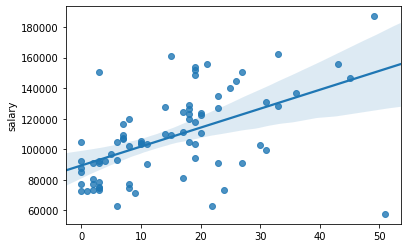

In [43]:
sns.regplot(salaries[['service']],salaries['salary'],ci=95);

Our initial results tell us that service does influence salary so we need to see if that accounts for the difference in the male/female salary averages. We can start with a t-test of the hypothesis that the average salary for men and women is the same. We are now testing (at the 95% confidence level) that H_0: "male average salary = female average salary" and H_1: "male average salary does not equal female average salary". Note that this is a two-tailed test (the default in Python) and we are looking for a `pvalue` less than 0.05 if we want to reject the null hypothesis.

Use the `SciPy` statistics package to compare the means of the salaries of the split dataframes `male_staff` and `female_staff`:

In [44]:
#t-test comparing average salaries for men and women
sp.stats.ttest_ind(male_staff.salary, female_staff.salary)

Ttest_indResult(statistic=2.2486865976699053, pvalue=0.027429778657910103)

We can see that the p-value of the t-statistic is 0.027 which is less than 0.05. We can therefore reject the hypothesis that the two averages are the same.

Let's do another regression but this time split by sex, this will give us an estimate at the 95% significance level for the starting salaries and yearly increases for men and women seperately:

In [45]:
lm_salaries_male = smf.ols(formula="salary ~ service", data=male_staff).fit()
lm_salaries_female = smf.ols(formula="salary ~ service", data=female_staff).fit()

print('Male Results:', lm_salaries_male.summary())
print('Female Results:', lm_salaries_female.summary())

Male Results:                             OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     10.69
Date:                Mon, 24 Feb 2020   Prob (F-statistic):            0.00233
Time:                        16:43:21   Log-Likelihood:                -450.76
No. Observations:                  39   AIC:                             905.5
Df Residuals:                      37   BIC:                             908.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.679e+04   6962.017     1

In both cases above, the p-values are less than 0.05 so there is a definite predictive power of length of service on the two sets of salaries. Let's look at the parameters of the two models together:

In [46]:
lm_salaries_male.params.round(2)

Intercept    96792.52
service        984.58
dtype: float64

This tells us that the predicted starting salary for a male academic with no service is \\$96792.52 and the yearly salary increase is \\$984.58

In [47]:
lm_salaries_female.params.round(2)

Intercept    82068.51
service       1637.30
dtype: float64

This tells us that the predicted starting salary for a female academic with no service is \\$82068.51 and the yearly salary increase is \\$1637.30

This regression suggests that female academics start on a lower salary than their male counterparts, but receive much higher yearly increases to their salaries.

We can plot the two regressions together using `Seaborn's` 'regplot' as before. As we are superimposing two regressions onto the same axis, we need to explicitly colour code rather than using "hue":

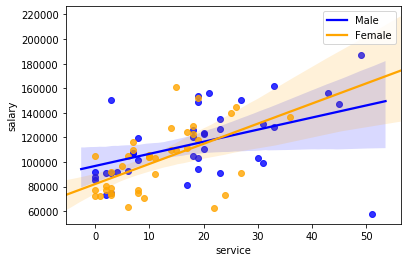

In [48]:
fig, ax = plt.subplots()
sns.regplot(x='service', y='salary', data=male_staff, ax=ax, color='blue');
sns.regplot(x='service', y='salary', data=female_staff, ax=ax, color='orange');
ax.legend(('Male','Female'));

We can see from the above that the starting salary for women appears to be much lower than that for men, but once employed they gain salary increases much faster based on their years of employment. We need to be careful with this conclusion however; there is little data for female salaries after 30 years of service and it may be that the yearly progression slows down again. 

We have more data for male academics at the post-30 years mark which makes the regression more reliable. Notice that there is also an outlier in the data - a male academic with over 50 years' service but a salary of only approx. \\$60000 - we should remove this datapoint if we want a more accurate picture.

We can calculate a "z-score" for each datapoint in the dataframe. The z-score tells us how many standard deviations a datapoint is from the mean. If it is too far away, we can remove it as an outlier.

First, we calculuate the z-scores for each data_set and display the location of any datapoints which are more than 2 standard deviations away from the mean.

In [49]:
#create an array of z-scores
z_male = np.abs(sp.stats.zscore(male_staff[['salary','service']]))

#print the array locations of datapoints which are too far away from the mean
print(np.where(z_male>2))

(array([0, 0, 9], dtype=int64), array([0, 1, 1], dtype=int64))


The above is a little hard to interpret, but the first array [0, 0, 9] tells us that there is an outlier in the 9th row, the second array [0,1,1] tells us it is an outlier in both the second ('salary') and third ('service') columns.

We can create a new dataframe with all the records of male_staff which are within 2 standard deviations of the mean; this should remove any outliers from the data:

In [50]:
#create a new dataframe column-by-column where all datapoints are within 2stds of the mean
male_staff_no_outliers = male_staff[(z_male < 2).all(axis=1)]
male_staff_no_outliers.head()

,rank,discipline,phd,service,sex,salary
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400


We should also do the same for the female data. Use the cell below to remove the outliers from the female data:

In [51]:
#create an array of z-scores called z_female
z_female = np.abs(sp.stats.zscore(female_staff[['salary','service']]))

#print the array locations of datapoints which are too far away from the mean
print(np.where(z_female>2))

#create a new dataframe called female_staff_no_outliers column-by-column 
#where all datapoints are within 2stds of the mean
female_staff_no_outliers = female_staff[(z_female < 2).all(axis=1)]
female_staff_no_outliers.head()

(array([ 1, 33], dtype=int64), array([1, 0], dtype=int64))


,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000
44,Prof,B,23,19,Female,151768


Let's now plot the same regression but using the data without outliers:

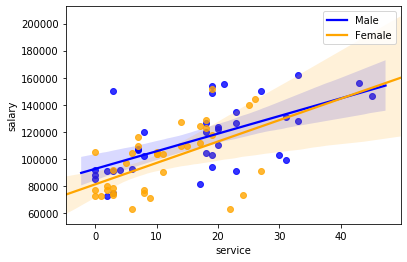

In [52]:
fig, ax = plt.subplots()
sns.regplot(x='service', y='salary', data=male_staff_no_outliers, ax=ax, color='blue');
sns.regplot(x='service', y='salary', data=female_staff_no_outliers, ax=ax, color='orange');
ax.legend(('Male','Female'));

We can see that the trends are closer together and that the length of time for a female academic to catch up to her male counterparts is actually longer than our original regression suggested.

## Activity
Complete another regression analysis to see how the number of PhD supervisions affects a person's salary, then compare male and female PhD supervisions seperately.

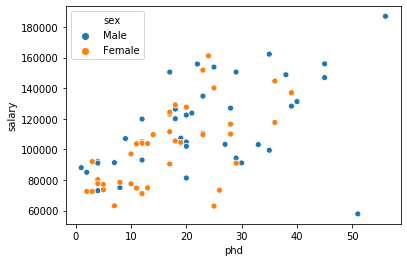

In [53]:
#plot a seaborn (sns) scatterplot with phd on the x axis, salary on the y axis and colour (hue) coded by sex 
#from the salaries dataframe
ax = sns.scatterplot(x='phd', y='salary', hue='sex', data=salaries)

In [54]:
# create a fitted model
lm_salaries_phd = smf.ols(formula="salary ~ phd", data=salaries).fit()
#print model summary
print(lm_salaries.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     30.03
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.31e-07
Time:                        16:43:22   Log-Likelihood:                -896.72
No. Observations:                  78   AIC:                             1797.
Df Residuals:                      76   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.935e+04   4365.651     20.468      0.0

In [55]:
#print the parameters of the model rounded to 2dp
lm_salaries_phd.params.round(2)

Intercept    82090.65
phd           1316.06
dtype: float64

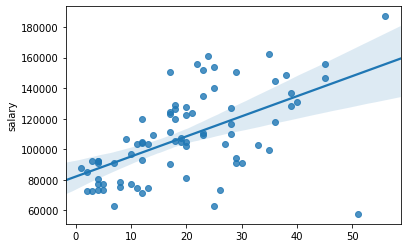

In [56]:
#plot a seaborn regression plot at the 95% significance level
sns.regplot(salaries[['phd']],salaries['salary'],ci=95);

In [57]:
#compute the two seperate regressions for male and female
lm_salaries_phd_male = smf.ols(formula="salary ~ phd", data=male_staff).fit()
lm_salaries_phd_female = smf.ols(formula="salary ~ phd", data=female_staff).fit()

#print the two regression summaries
print(lm_salaries_phd_male.summary())
print(lm_salaries_phd_female.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     13.55
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000736
Time:                        16:43:23   Log-Likelihood:                -449.62
No. Observations:                  39   AIC:                             903.2
Df Residuals:                      37   BIC:                             906.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.063e+04   7765.435     11.671      0.0

In [58]:
#print the parameters of the male regression
lm_salaries_phd_male.params.round(2)

Intercept    90633.54
phd           1066.13
dtype: float64

In [59]:
#print the parameters of the female regression
lm_salaries_phd_female.params.round(2)

Intercept    73840.76
phd           1644.88
dtype: float64

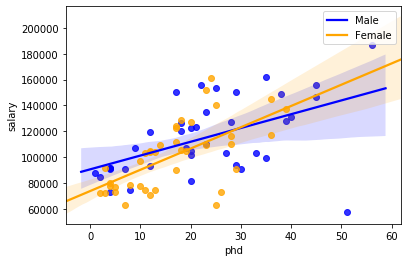

In [60]:
#plot the two regressions on a single axis
fig, ax = plt.subplots()
sns.regplot(x='phd', y='salary', data=male_staff, ax=ax, color='blue');
sns.regplot(x='phd', y='salary', data=female_staff, ax=ax, color='orange');
ax.legend(('Male','Female'));

# 3. Dealing with Incomplete Data

Often when dealing with large datasets, we find that we have certain datapoints missing. Here we will see how we can transform the dataset into something which we can perform meaningful analysis on.

In [61]:
#read in the dataset concerning flights across America
flights = pd.read_csv('Flights.csv')
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


The dataset we have just loaded gives various observations about internal flights across America in 2013. 

Use the below cells to determine:\
i) how many airlines are included,\
ii) the longest departure delay,\
iii) the shortest flight,\
iv) the first and last date of the observations.

In [62]:
#How many airlines are in the dataset? (Hint: Use the unique() function on the 'carrier' column)
flights.carrier.unique().size

5

In [63]:
#What was the longest departure delay? (Hint: Use the max() function on the 'dep_delay' column)
flights.dep_delay.max()

1014.0

In [64]:
#What was the shortest flight? (Hint: Use the min() function on the 'distance' column)
flights.distance.min()

17

In [65]:
#What were the earliest and latest dates in the observations? (Hint: sort the data first by year, then month,
#then day. Then read the first and last row of the sorted data)

flights_chronological = flights.sort_values(by = ['year','month','day'], ascending=[True,True,True])
print(flights_chronological.head(1)[['year','month','day']])
print(flights_chronological.tail(1)[['year','month','day']])

   year  month  day
0  2013      1    1
       year  month  day
52979  2013     12   31


We have just seen an example of the `sort_values` function for dataframes. From the example above, we can see that the `by` parameter defines which variables we sort by (and in which order) and then the `ascending` parameter defines which direction to sort in.

We can also split the dataframe into smaller datasets. For example, the cell below isolates January's data and creates a new dataframe with it

In [66]:
flights_jan = flights[flights['month']==1]
flights_jan

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12780,2013,1,31,NaN,NaN,NaN,NaN,US,NaN,2163,LGA,DCA,NaN,214,NaN,NaN
12781,2013,1,31,NaN,NaN,NaN,NaN,US,NaN,2165,LGA,DCA,NaN,214,NaN,NaN
12782,2013,1,31,NaN,NaN,NaN,NaN,US,NaN,2167,LGA,DCA,NaN,214,NaN,NaN
12783,2013,1,31,NaN,NaN,NaN,NaN,UA,NaN,337,LGA,IAH,NaN,1416,NaN,NaN


### Task (10 minutes):
Create five new dataframes of split data:\
      i) All flights carried by 'UA'\
     ii) All flights longer than 1000 distance\
    iii) All flights with distination 'DCA'\
     iv) All flights in May with origin 'LGA'\
      v) All flights with departure delays longer than arrival delay (dep_delay>arr_delay)

In [67]:
#all UA flights
flights_UA = flights[flights['carrier']=='UA']
flights_UA.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,2013,1,1,558.0,-2.0,924.0,7.0,UA,N29129,194,JFK,LAX,345.0,2475,5.0,58.0
7,2013,1,1,558.0,-2.0,923.0,-14.0,UA,N53441,1124,EWR,SFO,361.0,2565,5.0,58.0


In [68]:
#all short flights (1000)
flights_short = flights[flights['distance']<1000]
flights_short.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
5,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0
12,2013,1,1,606.0,-4.0,837.0,-8.0,DL,N3739P,1743,JFK,ATL,128.0,760,6.0,6.0
15,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,575,EWR,ATL,120.0,746,6.0,15.0


In [69]:
#all flights to DCA
flights_to_DCA = flights[flights['dest']=='DCA']
flights_to_DCA.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
146,2013,1,1,1058.0,-2.0,1210.0,-6.0,US,N951UW,2171,LGA,DCA,50.0,214,10.0,58.0
220,2013,1,1,1439.0,-6.0,1558.0,-15.0,DL,N319NB,1972,JFK,DCA,56.0,213,14.0,39.0
226,2013,1,1,1453.0,-7.0,1601.0,-19.0,US,N951UW,2179,LGA,DCA,51.0,214,14.0,53.0
353,2013,1,1,1853.0,-7.0,2004.0,-14.0,US,N951UW,2187,LGA,DCA,54.0,214,18.0,53.0
454,2013,1,2,657.0,-3.0,806.0,-3.0,US,N945UW,2163,LGA,DCA,46.0,214,6.0,57.0


In [70]:
#all May flights from LGA
flights_May_DCA = flights[(flights['month']==5) & (flights['origin']=='LGA')]
flights_May_DCA.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
92275,2013,5,1,544.0,-1.0,818.0,-9.0,UA,N494UA,450,LGA,IAH,190.0,1416,5.0,44.0
92276,2013,5,1,553.0,-7.0,655.0,-6.0,US,N702UW,2114,LGA,BOS,35.0,184,5.0,53.0
92277,2013,5,1,554.0,-6.0,731.0,-25.0,DL,N327NB,731,LGA,DTW,74.0,502,5.0,54.0
92278,2013,5,1,554.0,-6.0,707.0,-18.0,UA,N439UA,635,LGA,ORD,112.0,733,5.0,54.0
92279,2013,5,1,554.0,-6.0,649.0,-10.0,US,N763US,2161,LGA,DCA,41.0,214,5.0,54.0


In [71]:
#All flights with longer departure delays than arrival delays
flights_dep_arr = flights[flights['dep_delay']>flights['arr_delay']]
flights_dep_arr.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
7,2013,1,1,558.0,-2.0,923.0,-14.0,UA,N53441,1124,EWR,SFO,361.0,2565,5.0,58.0
9,2013,1,1,559.0,-1.0,854.0,-8.0,UA,N76515,1187,EWR,LAS,337.0,2227,5.0,59.0
11,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,1895,EWR,MIA,152.0,1085,6.0,6.0
12,2013,1,1,606.0,-4.0,837.0,-8.0,DL,N3739P,1743,JFK,ATL,128.0,760,6.0,6.0


You may have spotted that some of the observations are missing (denoted as NaN). This will interfere with our statistics. The easiest way to deal with this is simply to drop all records with a missing observation from the dataframe. First let's view all records with missing observations:

In [72]:
#create a dataframe of records with missing data
flights_missing_data = flights[flights.isnull().any(axis=1)]
flights_missing_data

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159681,2013,9,28,1214.0,-11.0,1801.0,NaN,AA,N488AA,300,EWR,DFW,NaN,1372,12.0,14.0
159854,2013,9,28,NaN,NaN,NaN,NaN,AA,N320AA,1,JFK,LAX,NaN,2475,NaN,NaN
159855,2013,9,28,NaN,NaN,NaN,NaN,US,NaN,581,EWR,CLT,NaN,529,NaN,NaN
160185,2013,9,29,1734.0,23.0,2159.0,NaN,UA,N463UA,327,EWR,PDX,NaN,2434,17.0,34.0


In the cell above, we used `pandas` `isnull()` function. This checks for NaN values in the data. By default it counts records where *all* the observations are NaN. To modify this so that we catch all NaNs (even if it is the only one in the row), we use the `.any()` function. The parameter passed to `.any()` tells the function how to structure the new dataframe - in this case we want to preserve the indices and column names so we set `axis=1`.

We can drop all these NaN records from the dataset with the `.dropna()` function like so:

In [73]:
#create a new dataframe without any NaN entries
flights_complete = flights.dropna()
flights_complete

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,2013,9,30,2105.0,-1.0,2329.0,-25.0,UA,N477UA,475,EWR,IAH,175.0,1400,21.0,5.0
160750,2013,9,30,2121.0,21.0,2349.0,-25.0,DL,N193DN,2363,JFK,LAX,296.0,2475,21.0,21.0
160751,2013,9,30,2140.0,0.0,10.0,-30.0,AA,N335AA,185,JFK,LAX,298.0,2475,21.0,40.0
160752,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0


Now we have complete data, we can do some plotting and analysis. 

### Final Activity: How good an estimator is dep_delay for arr_delay?
Start by creating a scatter plot of dep_delay against arr_delay. Colour the data by carrier. You will need `sns.scatterplot()` and to use the "hue" parameter and the "data" parameter.

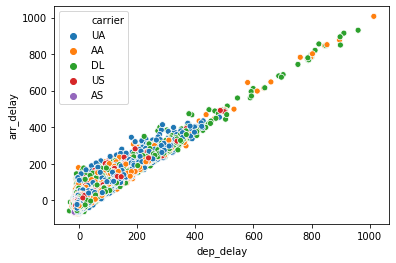

In [74]:
#create a scatter plot with `seaborn` plotting arr_delay against dep_delay by carrier
sns.scatterplot('dep_delay','arr_delay',hue='carrier',data=flights_complete);

There is clearly a strong linear relationship here. Let's finish with a linear regression of arr_delay against dep_delay to see how good a predictor of arrival delay we get from departure delay.

In [75]:
#create an OLS regression model and print its summary statistics
lm_flights_delays = smf.ols(formula="arr_delay ~ dep_delay", data=flights_complete).fit()

print(lm_flights_delays.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                 6.074e+05
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:43:32   Log-Likelihood:            -6.8778e+05
No. Observations:              157927   AIC:                         1.376e+06
Df Residuals:                  157925   BIC:                         1.376e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4457      0.049   -152.050      0.0

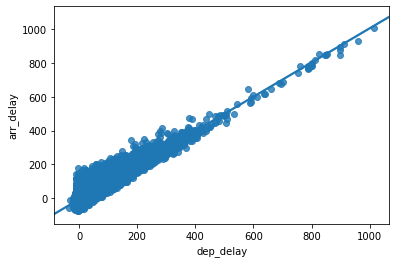

In [76]:
#create a regression plot of arr_delay against dep_delay for the complete data
sns.regplot(x='dep_delay', y='arr_delay', data=flights_complete);

So we have a function for computing arrival delay from departure delay:
`arr_delay` = 1.0138(`dep_delay`)-7.4457